In [4]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')


iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
iris.data.shape

(150, 4)

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Exploratory data analysis (EDA)

In [9]:


x = iris.data
y = iris.target

df = pd.DataFrame(x, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


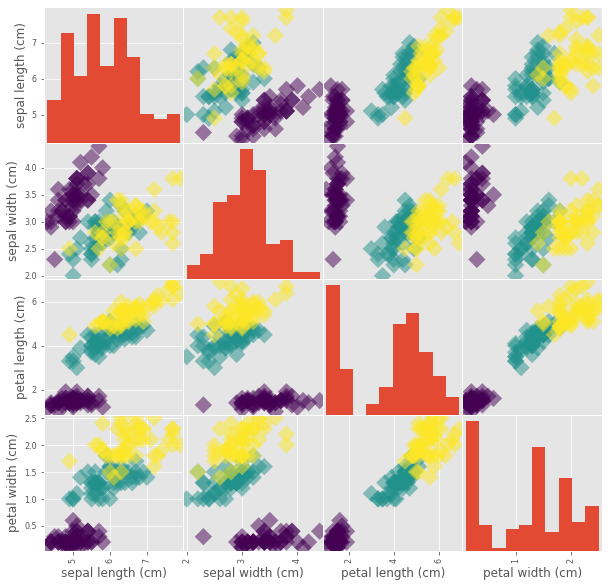

In [14]:
pd.plotting.scatter_matrix(df, c=y, s=150, marker='D', figsize=[10, 10]);

# fit a classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(iris.data, iris.target)

p = knn.predict(iris.data[10:11])
iris.target_names[p[0]]

'setosa'

## Model testing

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=21, stratify=iris.target)

In [62]:
y_test.shape

(30,)

In [65]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

In [66]:
knn.score(x_test, y_test)

0.9333333333333333

# Digit datasets

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 8, 8)
(1797, 64)


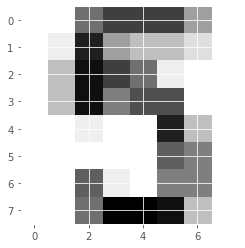

In [70]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
#print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [71]:
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


# Compare neighbors size

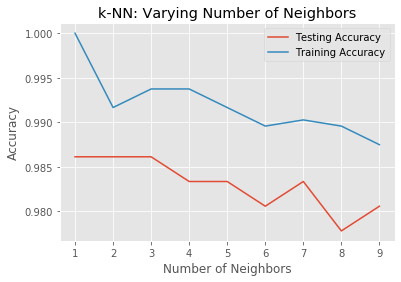

In [74]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
